# Advanced Data Science Capstone Project - Airbnb Price Prediction

## 1. Data source and use case

The dataset consists of airbnb listings and metrics in New York City (NYC) in 2019. Information about the hosts, their geographical and coordinate locations, reviews and availability of almost 50 thousand listings are provided in the data file. Also provided are the accommodation type, minimum number of night and the price per night. This public dataset is available at: https://www.kaggle.com/dgomonov/new-york-city-airbnb-open-data

Airbnb is a widely known platform that brings homeowners offering affordable, short-term accommodations and trip goers looking for accommodations together. Either for an homeowner planning to start an airbnb rental business or a an individual looking for a place to stay, rental price is the number one factor.  In this project, we will develop and training a machine learning model that predicts the price of airbnb rentals in NYC. 

## 2. Initial data exploration

In this section, we will be exploring some of the information entailed in the dataset using Pandas APIs. Let's start by loading and previewing the data

In [1]:
import pandas as pd
import numpy as np

df = pd.read_csv('C:\\Users\\miket\\Desktop\\Machine_learning Data_science\\Projects\\Kaggle projects\\Predict Airbnb price\\AB_NYC_2019.csv')
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


Let's inspect the columns..

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

We see that there are 6 object type features and 10 numerical features. Let's see some statistics on the numerical features

In [3]:
df.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


Comparing the interquatile range (75% - 25%) to max values, we can infer that there are outliers in *price, minimum_nights, number_of_reviews, reviews_per_month* and *calculated_host_listings_count*. Lets visualize.

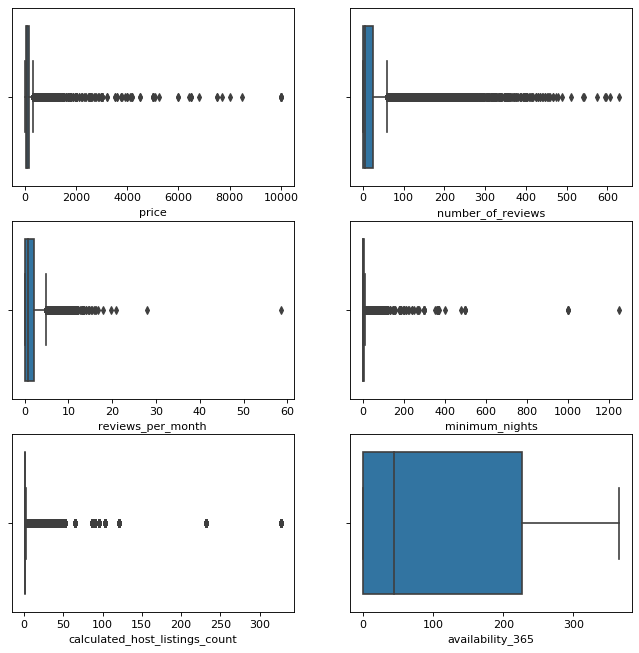

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,10), dpi=80)
plt.subplot(321); sns.boxplot(df['price'])
plt.subplot(322); sns.boxplot(df['number_of_reviews'])
plt.subplot(323); sns.boxplot(df['reviews_per_month'])
plt.subplot(324); sns.boxplot(df['minimum_nights'])
plt.subplot(325); sns.boxplot(df['calculated_host_listings_count'])
plt.subplot(326); sns.boxplot(df['availability_365'])

plt.show()

There are obvious outliers in all the categories except for *availability_365*. We will deal with this, but first lets explore the non-numerical features.

In [5]:
df.describe(include=['object'])

,name,host_name,neighbourhood_group,neighbourhood,room_type,last_review
count,48879,48874,48895,48895,48895,38843
unique,47905,11452,5,221,3,1764
top,Hillside Hotel,Michael,Manhattan,Williamsburg,Entire home/apt,2019-06-23
freq,18,417,21661,3920,25409,1413


We can infer that there are about 50,000 airbnb rentals across 221 neighborhoods in 5 neighbourhood groups (5 boroughs) of NYC. Manhattan has the highest number of listings. Hillside hotel has the largest chain of rentals, present in 18 different locations. Also, of the 3 accommodation types, entire home/apt is the most common.

**Lets break it down with some tables and visuals.** 

**- Visualize rentalas location distribution**

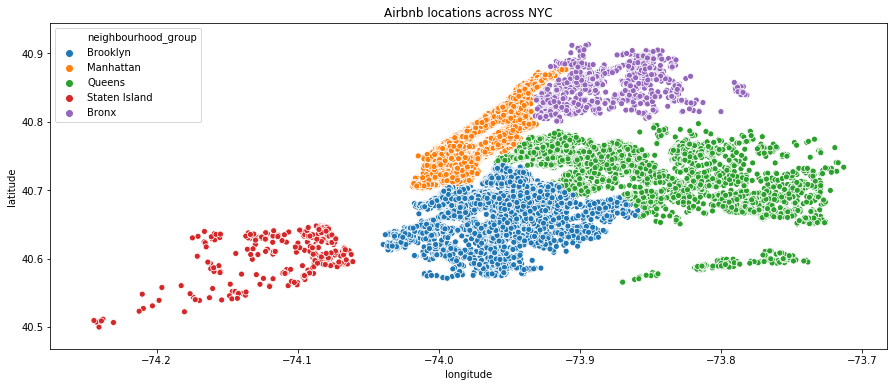

In [6]:
plt.figure(figsize=(15, 6))
sns.scatterplot(x=df.longitude,y=df.latitude,hue=df.neighbourhood_group)
plt.title('Airbnb locations across NYC')
plt.show()

**- Data by neighborhood group**

  neighbourhood_group  counts
0           Manhattan   21661
1            Brooklyn   20104
2              Queens    5666
3               Bronx    1091
4       Staten Island     373


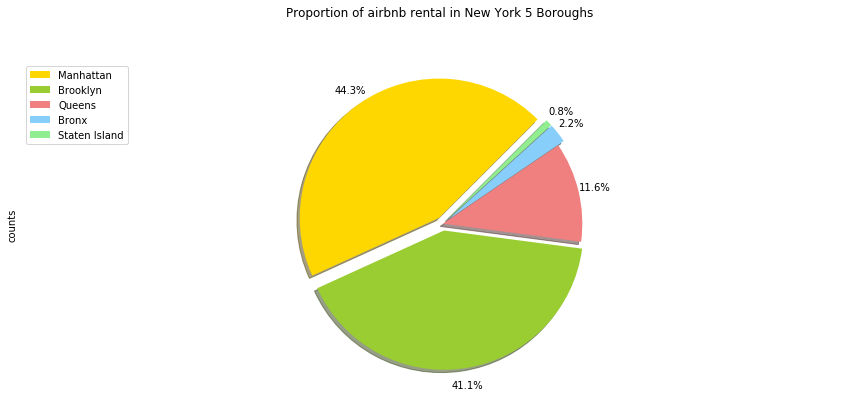

In [7]:
df_ng = df['neighbourhood_group'].value_counts().to_frame().reset_index()
df_ng = df_ng.rename(columns={'index':'neighbourhood_group','neighbourhood_group':'counts'})
print(df_ng)

colors_list = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue', 'lightgreen']
explode_list = [0.05, 0.05, 0, 0.05, 0.05] # ratio for each feature with which to offset each wedge.

df_ng['counts'].plot(kind='pie',
                            figsize=(15, 6),
                            autopct='%1.1f%%', 
                            startangle=45,    
                            shadow=True,       
                            labels=None,         # turn off labels on pie chart
                            pctdistance=1.12,    # the ratio between the center of each pie slice and the start of the text generated by autopct 
                            colors=colors_list,  # add custom colors
                            explode=explode_list # 'explode' lowest 3 continents
                            )

# scale the title up by 12% to match pctdistance
plt.title('Proportion of airbnb rental in New York 5 Boroughs', y=1.12) 
plt.axis('equal') 
# add legend
plt.legend(labels=df_ng['neighbourhood_group'], loc='upper left') 

plt.show()

Around 85% of all the rentals are either in Manhattan or Brooklyn while less than 1% are in Staten Island

**- Average price across neighborhood groups**

                     average_price
neighbourhood_group               
Bronx                    87.496792
Brooklyn                124.383207
Manhattan               196.875814
Queens                   99.517649
Staten Island           114.812332


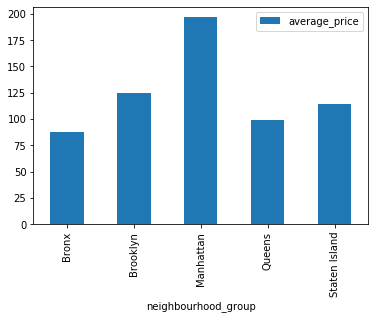

In [8]:
df_avg_price = df[['neighbourhood_group','price']].groupby(['neighbourhood_group'],as_index=True).mean()
df_avg_price =df_avg_price.rename(columns={'price':'average_price'})
print(df_avg_price)
df_avg_price.plot.bar()
plt.show()

This shows that on the average, Manhattan is significantly more expensive than other places for airbnb rentals while Bronx is the cheapest.

**- Average price across neighborhood groups by room type**

                    average_price                                      \
neighbourhood_group         Bronx    Brooklyn   Manhattan      Queens   
room_type                                                               
Entire home/apt        127.506596  178.327545  249.239109  147.050573   
Private room            66.788344   76.500099  116.776622   71.762456   
Shared room             59.800000   50.527845   88.977083   69.020202   

                                   
neighbourhood_group Staten Island  
room_type                          
Entire home/apt        173.846591  
Private room            62.292553  
Shared room             57.444444  


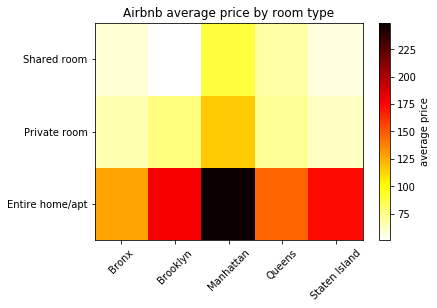

In [9]:
df_rm_typ = df[['neighbourhood_group','room_type','price']].groupby(['neighbourhood_group','room_type'],as_index=False).mean()
df_rm_typ = df_rm_typ.rename(columns={'price':'average_price'})
df_pivot = df_rm_typ.pivot(index='room_type',columns='neighbourhood_group')
print(df_pivot)
fig,ax = plt.subplots()
im = ax.pcolor(df_pivot, cmap='hot_r')

ylabels = df_pivot.columns.levels[1]
xlabels = df_pivot.index

ax.set_xticks(np.arange(df_pivot.shape[1]) + 0.5, minor=False)
ax.set_yticks(np.arange(df_pivot.shape[0]) + 0.5, minor=False)

ax.set_xticklabels(ylabels, minor=False)
ax.set_yticklabels(xlabels, minor=False)

#rotate label if too long
plt.xticks(rotation=45)
plt.title('Airbnb average price by room type')

cbar = fig.colorbar(im)
cbar.ax.set_ylabel('average price')
plt.show()

As one would expect, renting an entire home is more expensive than renting either a shared or private room across all 5 boroughs. However, it costs roughly as much to rent an entire home in Bronx as renting a private room in Manhanttan.

## 3. Feature creation/Enginnering

In this section, we will extract, transform and engineer the features that we will be using to train our model. Steps will include: 
* features correlation check
* feature extraction
* null removal
* outliers removal
* categorical feature encoding
* feature normalization

**Features correlation check**
* Lets make a correllation plot to check for redundancy in the features or how the correlate with the price

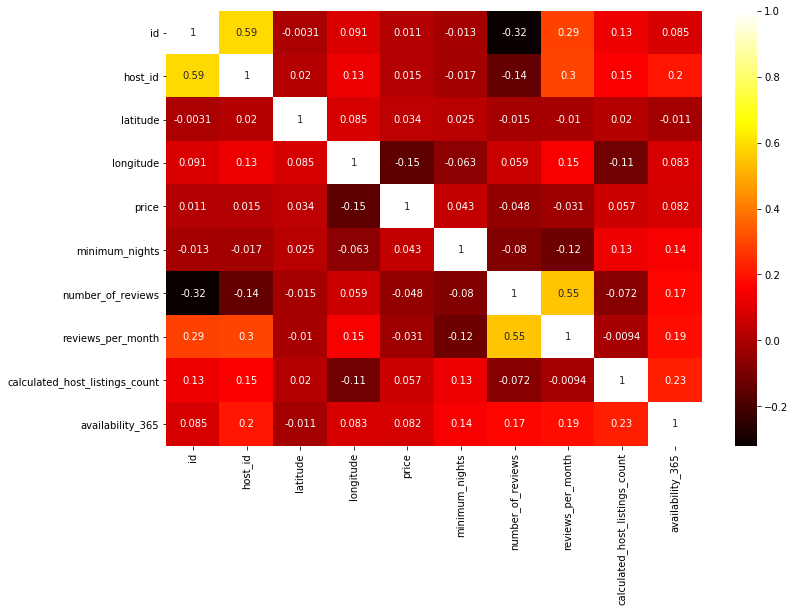

In [10]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(), cmap='hot',annot=True)
plt.show()

None of the numerical features correlate with price. However, there is considerable correlation between id and host_id as well as reviews_per_month and number_of_reviews.

**Feature extraction**      

We will remove features that are presumably not useful for price prediction. Note that the choice of features to remove here is mostly based on intuition. These include:
- id
- name
- host_id
- host_name                      
- latitude                        
- longitude
- last_review
- reviews_per_month  (removed based on strong correlation with number of reviews)

In [11]:
def feature_extract(df):
    df_extract_features_1 = df.drop(['id','name','host_id','host_name','latitude','longitude',
                                     'last_review','reviews_per_month'],axis=1)
    return df_extract_features_1
df_extract_features_1 = feature_extract(df)
df_extract_features_1.head(3)

,neighbourhood_group,neighbourhood,room_type,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365
0,Brooklyn,Kensington,Private room,149,1,9,6,365
1,Manhattan,Midtown,Entire home/apt,225,1,45,2,355
2,Manhattan,Harlem,Private room,150,3,0,1,365


**Null removal**
* lets check for and remove nulls/NaNs

In [12]:
df_extract_features_1.isnull().sum()

neighbourhood_group               0
neighbourhood                     0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

There are no NaNs!

**Categorical feature encoding**

There are 3 non-numerical categorical features we need to encode before proceeding to define our model. These are *neighbourhood_group, neighbourhood* and *room_type*. We'll do this as follows..

In [13]:
def feature_encoding(df_extract_features_1, cols=['room_type','neighbourhood_group','neighbourhood']):
    rmtyp = pd.get_dummies(df_extract_features_1['room_type'])
    neigh_grp = pd.get_dummies(df_extract_features_1['neighbourhood_group'])
    neigh = pd.get_dummies(df_extract_features_1['neighbourhood'])
    df_extract_features_2 = pd.concat([df_extract_features_1,rmtyp,neigh_grp,neigh], axis=1)
    df_extract_features_3 = df_extract_features_2.drop(['room_type','neighbourhood_group','neighbourhood'],axis=1)
    return df_extract_features_3
df_extract_features_3 = feature_encoding(df_extract_features_1)
df_extract_features_3.shape

(48895, 234)

## 4. Model defining and training

The task at hand is price prediction, which is basically a regresion problem. More so, given that our dataset is relatively small (46918 by 232) we will be using __scikit-learn based regressors__. In addition, we will also build a keras deep learning model for comparison.

### Model defining
We will define and test 3 regressors and the best will be chosen. These are:
* Linear Regressor
* Random Forest Regressor
* Extreme Gradient Boost Regressor

A Linear regressor is chosen because it's simple and fast, while the other two which are based on ensemble learning are chosen because our training data are mostly categorical (228 of 232 features) consisting only of 0s and 1s.

In [14]:
from sklearn.linear_model import LinearRegression 
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# define the training and test datasets
X = df_extract_features_3.drop(['price'],axis=1).values
y = df_extract_features_3['price'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25,  # use 25% as test data
                                                    random_state=0)

scaler = StandardScaler()   # data scaling
lr = LinearRegression()
rfreg = RandomForestRegressor()
xgr = XGBRegressor(n_estimators=200)

### Model training and evaluation
We will now show our datasets to our previously defined models and evaluate their perfomance using **mean absolute error (MAE)** and **R^2 score** of the prediction.

In [15]:
regressors = {'Linear_Reg':lr,'RandomForest_Reg':rfreg,'XGB_Reg':xgr}
for name in regressors:
    regressor = regressors[name]
    pipeline = Pipeline(steps=[('scaler',scaler),('name',regressor)])
    model = pipeline.fit(X_train,y_train)
    score = model.score(X_test,y_test)
    predict = model.predict(X_test)
    mae = mean_absolute_error(y_test,predict)
    print(name+': score - %1.3f, mae - %1.4f'%(score,mae))

Linear_Reg: score - -2403551598558049730560.000, mae - 101942886148.2423
RandomForest_Reg: score - -0.109, mae - 70.4071
XGB_Reg: score - -0.275, mae - 69.8839


It appers the linear regression model failed and the other two performed really poorly based on their low R^2 scores. The reason for this poor performance is presumed to be due to the outliers in *price*. Let remove those outliers and retrain our models.

**Outliers removal**

We saw previuosly that there are outliers in *price, minimum_nights, number_of_reviews,* and *calculated_host_listings_count*. But since *price* is our target label, we be removing outliers only in *price*.

In [16]:
def outlier_remove(df_extract_features_3, col='price'):
    q3 = df_extract_features_3[col].quantile(0.75)  #3rd quartile
    q1 = df_extract_features_3[col].quantile(0.25)  #1st quartile
    price_ub = q3 + 1.5*(q3-q1)      # upper bound
    price_lb = q1 - 1.5*(q3-q1)     # lower bound
    df_extract_features_4 = df_extract_features_3[df_extract_features_3[col] < price_ub]  #remove points above the ub
    return df_extract_features_4

df_extract_features_4 = outlier_remove(df_extract_features_3)

print('removed outliers: ',df_extract_features_3.shape[0]-df_extract_features_4.shape[0])
print('New sample size = ',df_extract_features_4.shape[0])

removed outliers:  2977
New sample size =  45918


**Let's re-train the models**

In [35]:
# define the training and test datasets
X = df_extract_features_4.drop(['price'],axis=1).values
y = df_extract_features_4['price'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=0)

for name in regressors:
    regressor = regressors[name]
    pipeline = Pipeline(steps=[('scaler',scaler),('name',regressor)])
    model = pipeline.fit(X_train,y_train)
    score = model.score(X_test,y_test)
    predict = model.predict(X_test)
    mae = mean_absolute_error(y_test,predict)
    print(name+': score - %1.3f, mae - %1.4f'%(score,mae))

Linear_Reg: score - 0.515, mae - 34.6763
RandomForest_Reg: score - 0.513, mae - 33.8341
XGB_Reg: score - 0.567, mae - 32.2854


The linear regression model still doesn't work, which means it's probably not suitable for this project. However, we can now see considerable improvements in both the Random Forest and XGBoost regressors with the __latter showing a superior performance__ based on the higher R^2 score and lower mae than the former.

### Evaluation
Our preferred model is the __XGBoost regressor__ which we will now evaluate thoroughly with cross validation to ensure a well-balanced performance. 

In [18]:
from sklearn.model_selection import cross_validate

cv_scores = cross_validate(xgr, X, y, cv=4, scoring=('r2','neg_mean_absolute_error'),return_train_score=True)

In [19]:
print('cross validation R^2 scores: ', cv_scores['train_r2'])
print('cross validation mae: ', -1*cv_scores['test_neg_mean_absolute_error'])

cross validation R^2 scores:  [0.68336763 0.67715561 0.6721941  0.65101663]
cross validation mae:  [33.58390876 32.3122366  32.01449936 37.14285332]


The cross validation R^2 scores and the corresponding mae are fairly consistent across all testing combinations which indicates that our model generalizes well.

### Using a deep learning model
We will now try a deep learning model to see if we can obtain a better performance. Lets start by defining a 3-layer (1 hidden layer) neural network model based on Keras.
* __Model design:__ the choice of the number of nodes as well as the depth of the model here is purely empirical becuase Using more than 3 layers had no notable effect on the performance neither did using more nodes.
* Other available optimizers such *adam, adamax* and *RMSprop* also work as well as the *nadam* optimizer chosen here.
* One node is chosen in the output layer for regression and *relu* activation is used because because __price__ has 0 lower bound and no upper bound

In [47]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
import numpy as np
seed = 1
np.random.seed(seed)

dl_model = Sequential()
dl_model.add(Dense(100, input_shape=(X_train.shape[1],), activation='relu'))  #kernel_initializer='normal'
dl_model.add(Dense(100, activation = 'relu'))
dl_model.add(Dense(1, activation='relu'))
dl_model.compile(loss='mean_absolute_error', optimizer='adam')

In [48]:
dl_model.fit(X_train,y_train, batch_size=50, epochs=10, verbose=1)

Epoch 1/10
827/827 [==============================] - 3s 4ms/step - loss: 50.1503
Epoch 2/10
827/827 [==============================] - 5s 6ms/step - loss: 33.9113
Epoch 3/10
827/827 [==============================] - 4s 5ms/step - loss: 33.5570
Epoch 4/10
827/827 [==============================] - 4s 5ms/step - loss: 33.1265
Epoch 5/10
827/827 [==============================] - 4s 5ms/step - loss: 32.9746
Epoch 6/10
827/827 [==============================] - 5s 5ms/step - loss: 32.8227
Epoch 7/10
827/827 [==============================] - 4s 5ms/step - loss: 32.7526
Epoch 8/10
827/827 [==============================] - 4s 5ms/step - loss: 32.4415
Epoch 9/10
827/827 [==============================] - 4s 5ms/step - loss: 32.4977
Epoch 10/10
827/827 [==============================] - 3s 4ms/step - loss: 32.2785


In [45]:
#price_predict = model.predict(X_test)
#ss_res = np.sum((price_predict - y_test.mean())**2)
#ss_tot = np.sum((y_test - y_test.mean())**2)
#r2 = 1 - ss_res/ss_tot
#print('R-squared: ',r2)
print('DeepLearning_Reg: ',dl_model.evaluate(X_test,y_test))

R-squared:  0.41105847187717637
144/144 [==============================] - 0s 2ms/step - loss: 32.6470
DeepLearning_Reg:  32.64703369140625


We see that using a deep neural network model there isn't any notable improvement in the performance as given by the mae when compared to the XGBoost regressor model.  

## 5. Adding more features
One reason why performance has not been so great thus far could be because the raw data has limited price-driving features. In this section, we will attempt to add more features from external datasets and see if there will be any improvements in model performance

### External datasets
The datasets we will consider consist of over 1 million crimes in NYC reported to NYPD spanning 14 months from 2013-2015 as well as population of NYC spanning several decades. The thought here is that crime rate could be a factor that drives the airbnb rentals price. The data is avaialble at https://www.kaggle.com/adamschroeder/crimes-new-york-city

Lets now load the datasets and extract the feature that we need.

In [23]:
df_crime = pd.read_csv('C:\\Users\\miket\\Desktop\\Machine_learning Data_science\\Projects\\Kaggle projects\\NYC_crime predict\\data\\NYPD_Complaint_Data_Historic.csv')
df_population = pd.read_csv('C:\\Users\\miket\\Desktop\\Machine_learning Data_science\\Projects\\Kaggle projects\\NYC_crime predict\\data\\Population_by_Borough_NYC.csv')
df_crime.head(3)

C:\Users\miket\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (17) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,CMPLNT_NUM,CMPLNT_FR_DT,CMPLNT_FR_TM,CMPLNT_TO_DT,CMPLNT_TO_TM,RPT_DT,KY_CD,OFNS_DESC,PD_CD,PD_DESC,...,ADDR_PCT_CD,LOC_OF_OCCUR_DESC,PREM_TYP_DESC,PARKS_NM,HADEVELOPT,X_COORD_CD,Y_COORD_CD,Latitude,Longitude,Lat_Lon
0,101109527,12/31/2015,23:45:00,NaN,NaN,12/31/2015,113,FORGERY,729.0,"FORGERY,ETC.,UNCLASSIFIED-FELO",...,44.0,INSIDE,BAR/NIGHT CLUB,NaN,NaN,1007314.0,241257.0,40.828848,-73.916661,"(40.828848333, -73.916661142)"
1,153401121,12/31/2015,23:36:00,NaN,NaN,12/31/2015,101,MURDER & NON-NEGL. MANSLAUGHTER,NaN,NaN,...,103.0,OUTSIDE,NaN,NaN,NaN,1043991.0,193406.0,40.697338,-73.784557,"(40.697338138, -73.784556739)"
2,569369778,12/31/2015,23:30:00,NaN,NaN,12/31/2015,117,DANGEROUS DRUGS,503.0,"CONTROLLED SUBSTANCE,INTENT TO",...,28.0,NaN,OTHER,NaN,NaN,999463.0,231690.0,40.802607,-73.945052,"(40.802606608, -73.945051911)"


In [24]:
df_population.head(3)

,Age Group,Borough,1950,1950 - Boro share of NYC total,1960,1960 - Boro share of NYC total,1970,1970 - Boro share of NYC total,1980,1980 - Boro share of NYC total,...,2000,2000 - Boro share of NYC total,2010,2010 - Boro share of NYC total,2020,2020 - Boro share of NYC total,2030,2030 - Boro share of NYC total,2040,2040 - Boro share of NYC total
0,Total Population,NYC Total,"7,891,957",100%,"7,781,984",100%,"7,894,862",100%,"7,071,639",100%,...,"8,008,278",100%,"8,242,624",100%,"8,550,971",100%,"8,821,027",100%,"9,025,145",100%
1,Total Population,Bronx,"1,451,277",18.39%,"1,424,815",18.31%,"1,471,701",18.64%,"1,168,972",16.53%,...,"1,332,650",16.64%,"1,385,108",16.8%,"1,446,788",16.92%,"1,518,998",17.22%,"1,579,245",17.5%
2,Total Population,Brooklyn,"2,738,175",34.7%,"2,627,319",33.76%,"2,602,012",32.96%,"2,230,936",31.55%,...,"2,465,326",30.78%,"2,552,911",30.97%,"2,648,452",30.97%,"2,754,009",31.22%,"2,840,525",31.47%


### Feature extraction
Looking at the above datasets, the feature we could integrate to our existing dataset is __crime per capita__ across the 5 boroughs. Lets extract this

In [25]:
nyc_crimes = df_crime['BORO_NM'].value_counts().to_frame().reset_index()
nyc_crimes = nyc_crimes.rename(columns={'index':'Borough','BORO_NM':'all_crimes'})
nyc_pop = df_population[['Borough','2010']]    # 2010 population data is actual, not projection
nyc_pop = nyc_pop.drop([0]).reset_index().drop(['index'],axis=1)
print(nyc_crimes)
print('')
print(nyc_pop)

         Borough  all_crimes
0       BROOKLYN      315648
1      MANHATTAN      244749
2          BRONX      227477
3         QUEENS      211958
4  STATEN ISLAND       48743

            Borough       2010
0             Bronx  1,385,108
1          Brooklyn  2,552,911
2         Manhattan  1,585,873
3            Queens  2,250,002
4     Staten Island    468,730


**Create new features**

In [26]:
nyc_crimes = nyc_crimes.sort_values(by=['Borough'],ignore_index=True)
nyc_pop['2010'] = nyc_pop['2010'].map(lambda x: int(x.replace(',',''))) # convert to integer
nyc_pop['Borough'] = nyc_pop['Borough'].map(lambda x: x.strip(' ').lower())
nyc_pop['crime_per_capita'] = nyc_crimes['all_crimes']/nyc_pop['2010']
df_new_feature_1 = nyc_pop.drop(['2010'],axis=1).rename(columns={'Borough':'neighbourhood_group'})
df_new_feature_1


,neighbourhood_group,crime_per_capita
0,bronx,0.164231
1,brooklyn,0.123642
2,manhattan,0.154331
3,queens,0.094203
4,staten island,0.103990


In [27]:
nyc_crimes['all_crimes'] = nyc_crimes['all_crimes']/nyc_crimes['all_crimes'].max()
nyc_crimes['Borough'] = nyc_crimes['Borough'].map(lambda x: x.lower())
df_new_feature_2 = nyc_crimes.rename(columns={'Borough':'neighbourhood_group'})
df_new_feature_2

,neighbourhood_group,all_crimes
0,bronx,0.720667
1,brooklyn,1.000000
2,manhattan,0.775386
3,queens,0.671501
4,staten island,0.154422


In [28]:
nyc_pop['2010'] = nyc_pop['2010']/nyc_pop['2010'].max()
df_new_feature_3 = nyc_pop.drop(['crime_per_capita'],axis=1).rename(columns={'Borough':'neighbourhood_group',
                                                                      '2010':'population_2010'})
df_new_feature_3


,neighbourhood_group,population_2010
0,bronx,0.542560
1,brooklyn,1.000000
2,manhattan,0.621202
3,queens,0.881348
4,staten island,0.183606


Now that we've created a new feature, lets add to the existing training set and redo the necessary feature engineering steps

In [29]:
df_extract_features_1['neighbourhood_group'] = df_extract_features_1['neighbourhood_group'].map(lambda row: row.lower())
df_extract_feature_5 = pd.merge(df_extract_features_1, df_new_feature_1, on='neighbourhood_group', how='inner')
#df_extract_feature_5 = pd.merge(df_extract_feature_5, df_new_feature_2, on='neighbourhood_group', how='inner')
#df_extract_feature_5 = pd.merge(df_extract_feature_5, df_new_feature_1, on='neighbourhood_group', how='inner')
df_extract_feature_5 = feature_encoding(df_extract_feature_5)
df_extract_feature_5.head(3)

,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365,crime_per_capita,Entire home/apt,Private room,Shared room,bronx,...,Westerleigh,Whitestone,Williamsbridge,Williamsburg,Willowbrook,Windsor Terrace,Woodhaven,Woodlawn,Woodrow,Woodside
0,149,1,9,6,365,0.123642,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,89,1,270,1,194,0.123642,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,60,45,49,1,0,0.123642,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


Lets remove the outliers once more..

In [30]:
df_extract_feature_6 = outlier_remove(df_extract_feature_5)
print('removed outliers: ',df_extract_feature_5.shape[0]-df_extract_feature_6.shape[0])
print('New sample size = ',df_extract_feature_6.shape[0])


removed outliers:  2977
New sample size =  45918


**Model training and evaluation**

Now we will show our dataset with the new feature to the our model. We will only use XGBoost here since it has the best performance so far

In [31]:
from sklearn.utils import shuffle

df_extract_feature_6= shuffle(df_extract_feature_6)  # shuffle data before train_test split
X = df_extract_feature_6.drop('price',axis=1).values
y = df_extract_feature_6['price'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=True, test_size=0.25, random_state=100)

In [32]:
pipeline2 = Pipeline(steps=[('scaler',scaler),('name',xgr)])
new_model = pipeline2.fit(X_train,y_train)
score = new_model.score(X_test,y_test)
predict = new_model.predict(X_test)
mae= mean_absolute_error(y_test,predict)
    
print('score - %1.3f, mae - %1.4f'%(score,mae))

score - 0.555, mae - 32.5322


Again, there is no notable change in performance. This could be because crime rate has a negligible effect on airbnb rental price in NYC since it's mostly comparable in the largest boroughs.

# 6. Final result: Data product

This is the last section of this project. We will now deploy our model by predicting the airbnb rental prices at randomly selected locations in our original dataset. Our predictions will then be projected onto a geographic map for easy and interactive viewing.

#### Prediction

In [46]:
df_encoded =  feature_encoding(df)
df_deploy = df_encoded.sample(frac=0.01, replace=False, random_state=1)   # randomly sampled locattions
deploy_data = feature_extract(df_deploy)   # extract the relevant features for price prediction
deploy_model_data = deploy_data.drop(['price'],axis=1)   
price_predict = model.predict(deploy_model_data)     # show data to our trained model
Data_product = pd.DataFrame(list(zip(df_deploy['latitude'].values, df_deploy['longitude'].values,
                                price_predict)),columns=['latitude','longitude','predicted_price'])
Data_product.head()

,latitude,longitude,predicted_price
0,40.74596,-73.87762,76.291924
1,40.75883,-73.92160,169.793915
2,40.69670,-73.97477,73.042671
3,40.72435,-73.95154,77.275291
4,40.72754,-73.98555,176.782715


#### Visualization
Our predicted prices will now be projected onto an interactive geographic map using Folium APIs.

In [49]:
import folium
from folium import plugins

# New York coordinates
lat = 40.7128
lon = -74.0060
ny_map = folium.Map(location=[lat,lon], zoom_start=10)   # create new york map
# instantiate a marker cluster for the airbnb locations in the dataframe
airbnb_price =  plugins.MarkerCluster().add_to(ny_map)

latitudes = list(Data_product.latitude)
longitudes = list(Data_product.longitude)
labels = ['$'+str(int(x))+' per night' for x in price_predict]  # add pop-up price to each marker on the map
# loop through the data and add markers to feature group
i = 0
for lat, lng, label in zip(latitudes, longitudes, labels):
    airbnb_price.add_child(
        folium.features.CircleMarker(
            [lat, lng],
            radius=5, # define how big you want the circle markers to be
            color='yellow',
            fill=True,
            fill_color='blue',
            fill_opacity=0.6
        )
    )
    folium.Marker([lat, lng], popup=label).add_to(ny_map)

ny_map.add_child(airbnb_price)


#### Evaluation
Lets's visualize how well our predicted prices compare to the actual rental prices

In [ ]:
predict_v_actual = pd.DataFrame(list(zip(df_deploy['price'].values, price_predict)),
                                columns=['actual_price','predicted_price'])
predict_v_actual_no_outlier = outlier_remove(predict_v_actual,col='actual_price')
plt.figure(figsize=(12,4))
plt.subplot(121)
sns.scatterplot(x='actual_price',y='predicted_price',data=predict_v_actual)
plt.title('Predicted Vs actual price')
plt.subplot(122)
sns.scatterplot(x='actual_price',y='predicted_price',data=predict_v_actual_no_outlier)
plt.title('Predicted Vs actual price - outliers removed')
plt.show()

In [ ]:
predict_v_actual_no_outlier.corr()

With the outliers removed, a coefficient of __0.77__ indicates strong positive correlation!

### Consequence
As we could see from the graphs and the table above, except for some outliers, our price predictions correlate strongly with actual listing prices (and predictions are made with __65%__ confidence based on the cross validation evaluation). Although, there is room for improvement especially in feature addition, nonetheless, our model in it's current form could aid decision making for people looking to start airbnb hosting business in New York City as well as those who want a place to stay.